In [275]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

Q1,Q2

In [276]:
df = pd.read_csv('MAll_Customers.csv')
df = df.drop('CustomerID', axis=1)
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
79        1   49                  54                      42
197       0   32                 126                      74
38        1   36                  37                      26
24        1   54                  28                      14
122       1   40                  69                      58

Q3

In [277]:
description = train_df.drop('Gender', axis=1).describe()

print(description)

              Age  Annual Income (k$)  Spending Score (1-100)
count  160.000000          160.000000               160.00000
mean    38.912500           60.606250                51.77500
std     13.856582           27.395105                26.42063
min     18.000000           15.000000                 1.00000
25%     29.000000           39.750000                35.75000
50%     36.000000           62.000000                50.50000
75%     49.000000           78.000000                74.00000
max     70.000000          137.000000                99.00000


Q4-Q5

In [278]:
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df.drop('Gender', axis=1))
test_df_scaled = scaler.transform(test_df.drop('Gender', axis=1))


x_train_final = np.c_[train_df[["Gender"]] , train_df_scaled]
x_test_final = np.c_[test_df[["Gender"]] , test_df_scaled]
x_train_final.shape, x_test_final.shape

((160, 4), (40, 4))

Q6

In [279]:
def k_means_clustering(k, data):
    kmeans = KMeans(n_clusters=k, n_init=10,init="k-means++")
    kmeans.fit(data)
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    return cluster_centers, labels

cluster_centers, labels = k_means_clustering(6, train_df.iloc[:, 1:])
print("centers:")
print(cluster_centers)
print("labels:")
print(labels)


centers:
[[56.05128205 56.17948718 48.30769231]
 [32.94117647 87.82352941 82.97058824]
 [38.90909091 91.77272727 15.31818182]
 [25.26315789 25.68421053 80.52631579]
 [43.57894737 25.94736842 19.89473684]
 [28.         56.2962963  49.40740741]]
labels:
[0 1 4 4 5 1 3 3 1 0 5 1 3 0 0 0 2 0 2 0 1 5 3 4 3 0 4 1 0 2 5 1 2 3 0 5 4
 1 5 5 4 5 0 1 1 0 1 4 2 5 4 1 0 3 3 2 1 4 3 5 4 4 5 1 0 2 4 0 5 0 2 4 2 1
 0 1 0 4 1 4 0 0 1 2 3 3 2 1 5 3 2 5 5 2 5 2 3 5 0 1 2 2 1 5 0 4 3 0 5 0 2
 1 0 4 3 0 1 1 3 0 1 2 1 1 0 0 0 0 2 5 5 5 3 0 0 2 1 3 1 1 3 5 1 2 1 5 5 0
 5 0 5 1 4 2 0 0 4 0 1 0]


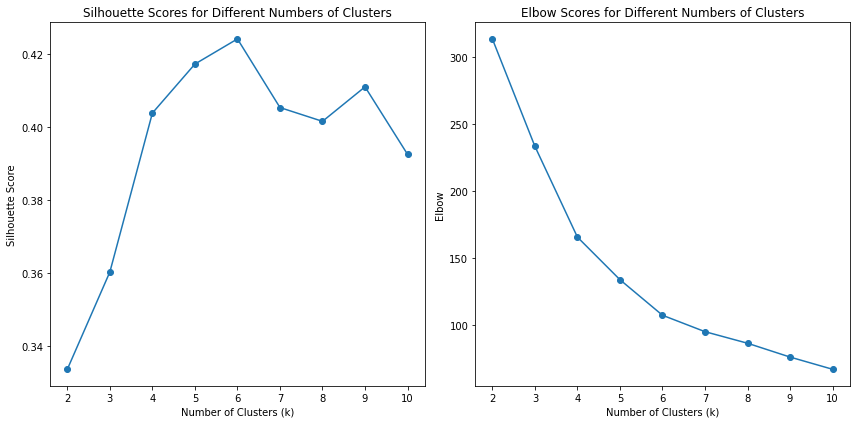

In [280]:
def apply_kmeans(k, data, num_iterations=1):
    min_silhouette = float('inf')
    min_inertia = float('inf')
    best_kmeans = None
    
    for _ in range(num_iterations):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        clusters = kmeans.fit_predict(data)
        silhouette = silhouette_score(data, kmeans.labels_)
        
        inertia = kmeans.inertia_
        
        if silhouette < min_silhouette:
            min_silhouette = silhouette
        if inertia < min_inertia:
            min_inertia = inertia
            best_kmeans = kmeans
            centers = kmeans.cluster_centers_
    
    return min_inertia, min_silhouette, best_kmeans,clusters,centers

k_values = list(range(2, 11))
min_inertia_scores = []
min_silhouette_scores = []
best_kmeans_models = []

for k in k_values:
    min_inertia, min_silhouette, best_kmeans,clusters,centers = apply_kmeans(k, train_df_scaled)
    min_inertia_scores.append(min_inertia)
    min_silhouette_scores.append(min_silhouette)
    best_kmeans_models.append(best_kmeans)

results_df = pd.DataFrame({
    'k_values': k_values,
    'min_inertia_scores': min_inertia_scores,
    'min_silhouette_scores': min_silhouette_scores
})

#print(results_df)
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(results_df.k_values, results_df.min_silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Plot Inertia Scores
plt.subplot(1, 2, 2)
plt.plot(results_df.k_values, results_df.min_inertia_scores, marker='o')
plt.title('Elbow Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Elbow')

plt.tight_layout()
plt.show()

Silhouette Score: The Silhouette score measures how well each data point in a cluster is similar to the other data points in the same cluster compared to the neighboring clusters. It ranges from -1 to 1, where a high value indicates that data points within the same cluster are similar to each other and well-separated from neighboring clusters. In other words, it quantifies how cohesive and distinct the clusters are. A score closer to 1 suggests better clustering.

Elbow Method: The Elbow method is an intuitive approach to estimate the optimal number of clusters (k). It involves plotting the within-cluster sum of squares (WCSS) against different values of k. WCSS measures the sum of squared distances between each data point and the centroid of its assigned cluster. As k increases, WCSS tends to decrease because the data points are closer to their centroids. The Elbow point on the plot is where the rate of decrease sharply changes, forming an "elbow." This point is considered the optimal k as it balances the trade-off between minimizing WCSS and avoiding excessive clusters.

In summary, the Silhouette score assesses the quality of clusters by measuring their cohesion and separation, while the Elbow method provides a visual heuristic for finding the optimal number of clusters. The combination of these two metrics can help determine the most suitable value of k for a clustering task.

based on these measures we can see that the value 6 for k best fits the data.

loss is 107.29827981804465
silhouette is 0.42415216143147366
centers are
[[ 0.03951531  1.08700516 -1.32033884]
 [-0.79000449 -0.15781965 -0.08989287]
 [-1.01080758 -1.29831854  1.01279766]
 [-0.43229071  0.9966282   1.18443557]
 [ 1.28204221 -0.19736946 -0.10536133]
 [ 0.43667933 -1.24685064 -1.25073076]]


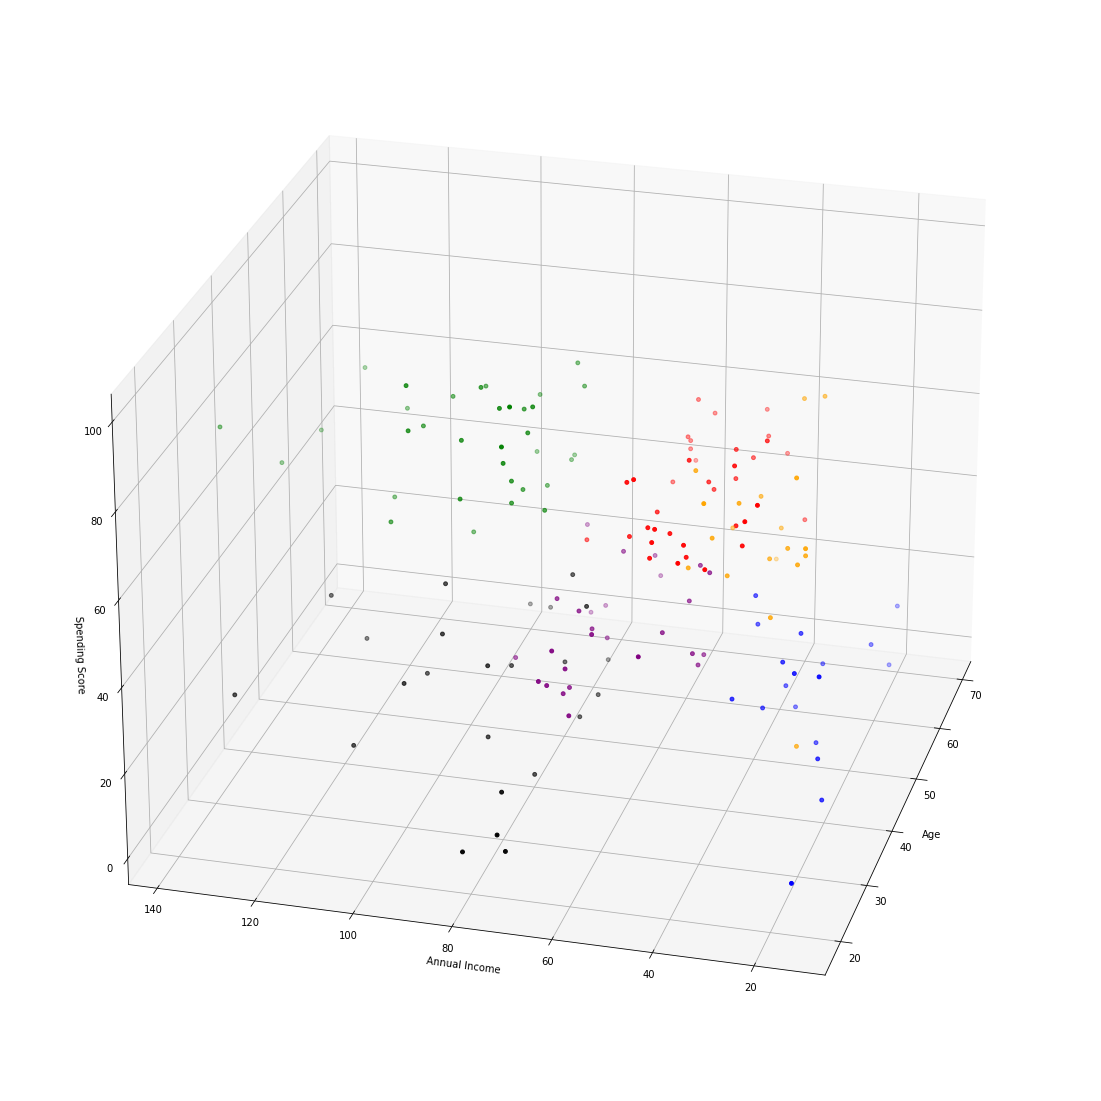

In [281]:
#Using optimal k = 6
min_inertia, min_silhouette,best_kmeans, clusters,centers = apply_kmeans(6, train_df_scaled)

print(f"loss is {min_inertia}")
print( f"silhouette is {min_silhouette}")   
print(f"centers are\n{centers}")
train_df["label"] = clusters
#print(train_df["label"])

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_df.Age[train_df.label == 0], train_df["Annual Income (k$)"][train_df.label == 0], train_df["Spending Score (1-100)"][train_df.label == 0], c='black', s=15)
ax.scatter(train_df.Age[train_df.label == 1], train_df["Annual Income (k$)"][train_df.label == 1], train_df["Spending Score (1-100)"][train_df.label == 1], c='purple', s=15)
ax.scatter(train_df.Age[train_df.label == 2], train_df["Annual Income (k$)"][train_df.label == 2], train_df["Spending Score (1-100)"][train_df.label == 2], c='orange', s=15)
ax.scatter(train_df.Age[train_df.label == 3], train_df["Annual Income (k$)"][train_df.label == 3], train_df["Spending Score (1-100)"][train_df.label == 3], c='green', s=15)
ax.scatter(train_df.Age[train_df.label == 4], train_df["Annual Income (k$)"][train_df.label == 4], train_df["Spending Score (1-100)"][train_df.label == 4], c='red', s=15)
ax.scatter(train_df.Age[train_df.label == 5], train_df["Annual Income (k$)"][train_df.label == 5], train_df["Spending Score (1-100)"][train_df.label == 5], c='blue', s=15)

ax.view_init(25, 195)

plt.ylabel("Annual Income")
plt.xlabel("Age")
ax.set_zlabel("Spending Score")
plt.show()

Q8

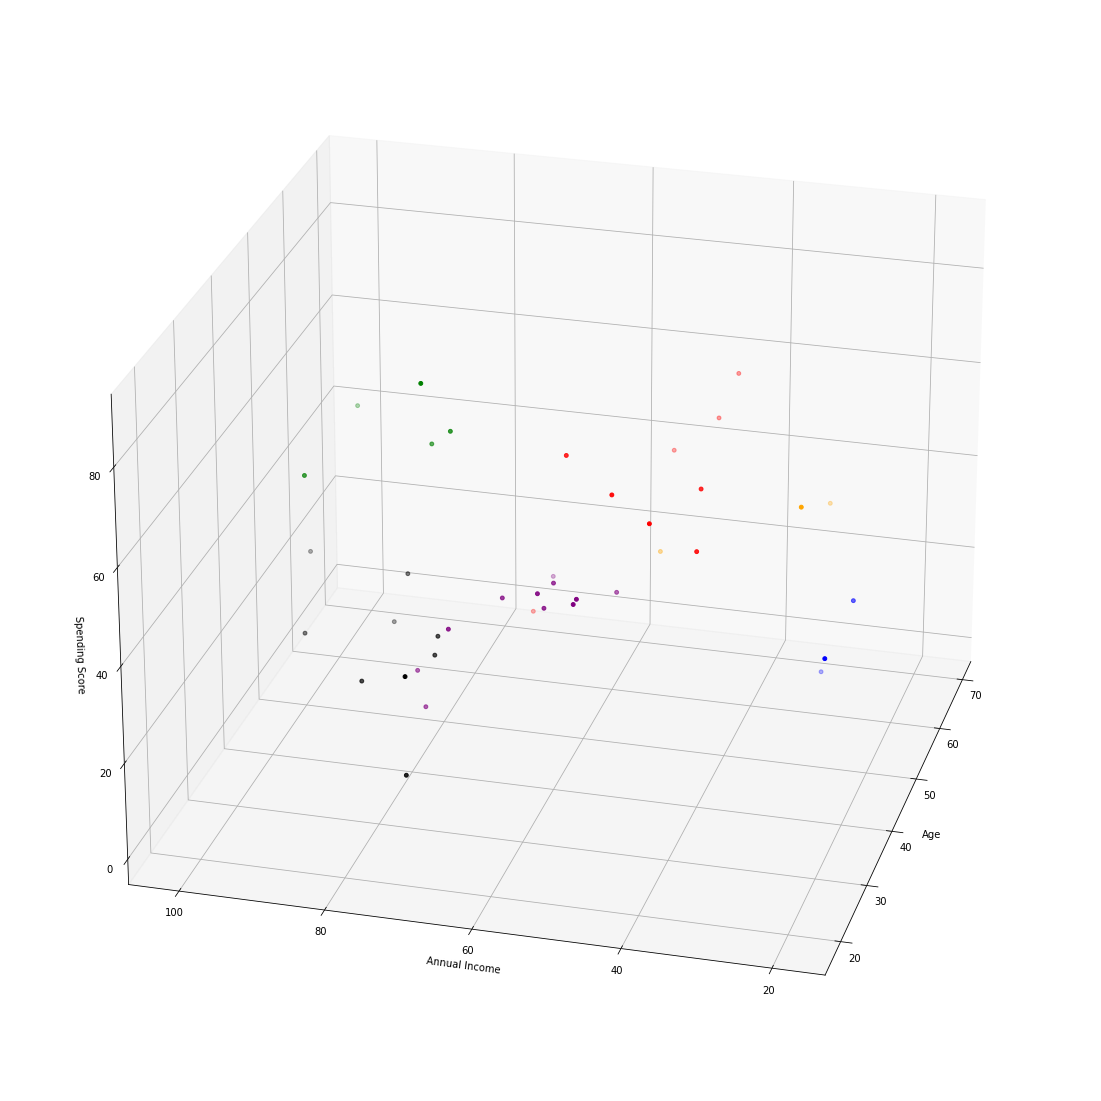

In [288]:
optimal_k = 6  
min_inertia, min_silhouette,best_kmeans, clusters,centers = apply_kmeans(optimal_k, train_df_scaled)

test_labels = best_kmeans.predict(test_df_scaled)
print(f"loss is {min_inertia}")
print( f"silhouette is {min_silhouette}")   
print(f"centers are\n{centers}")
test_df["label"] =test_labels

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_df.Age[test_df.label == 0], test_df["Annual Income (k$)"][test_df.label == 0], test_df["Spending Score (1-100)"][test_df.label == 0], c='black', s=15)
ax.scatter(test_df.Age[test_df.label == 1], test_df["Annual Income (k$)"][test_df.label == 1], test_df["Spending Score (1-100)"][test_df.label == 1], c='purple', s=15)
ax.scatter(test_df.Age[test_df.label == 2], test_df["Annual Income (k$)"][test_df.label == 2], test_df["Spending Score (1-100)"][test_df.label == 2], c='orange', s=15)
ax.scatter(test_df.Age[test_df.label == 3], test_df["Annual Income (k$)"][test_df.label == 3], test_df["Spending Score (1-100)"][test_df.label == 3], c='green', s=15)
ax.scatter(test_df.Age[test_df.label == 4], test_df["Annual Income (k$)"][test_df.label == 4], test_df["Spending Score (1-100)"][test_df.label == 4], c='red', s=15)
ax.scatter(test_df.Age[test_df.label == 5], test_df["Annual Income (k$)"][test_df.label == 5], test_df["Spending Score (1-100)"][test_df.label == 5], c='blue', s=15)
ax.view_init(25, 195)

plt.ylabel("Annual Income")
plt.xlabel("Age")
ax.set_zlabel("Spending Score")
plt.show()

Q9

In [283]:
predictions_df.to_csv('predicts.csv', index=False)

Q10

In [284]:
pca = PCA(n_components=2)

train_df_pca = pca.fit_transform(train_df_scaled)
test_df_pca = pca.transform(test_df_scaled)

To be able to show the separation of clusterized data, we can reduce the dimension of data using PCA algorithm 
and we reduced it to 2 dimensions.

Q11

In [285]:
min_inertia, min_silhouette,model, clusters,centers = apply_kmeans(optimal_k, train_df_pca)

pred = model.predict(test_df_pca)

test_df["PCA_Prediction"] = pred
test_df.to_csv("predicts.csv")


Q12

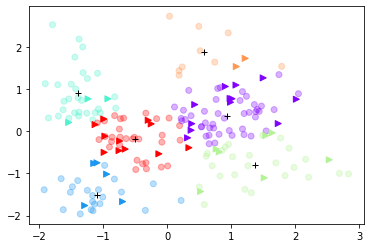

In [287]:
plt.set_cmap("rainbow_r")

plt.scatter(train_df_pca[:,0],train_df_pca[:,1],c=clusters , alpha=0.3)

plt.scatter(test_df_pca[:,0],test_df_pca[:,1],c=pred,alpha = 1,marker=">")

plt.scatter(centers[:,0],centers[:,1],color=(0,0,0),alpha=1 , marker="+" , linewidths=1);
